In [1]:
words = open("names.txt", "r").read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [2]:
max([(len(w),w) for w in words])

(15, 'muhammadmustafa')

In [3]:
import torch

In [71]:
alphabet = [chr(x) for x in range(ord("a"),ord("z")+1)]
stoi = { ch:i+1 for i,ch in enumerate(alphabet)}
stoi["."] = 0


itos = { i+1:ch for i, ch in enumerate(alphabet)}
itos[0] = "."



In [42]:
# array for all the alphabets + "."
N = torch.zeros(27,27, dtype=torch.int32)

for w in words[:]:
    chars = ["."] + list(w) + ["."]
    for c, ci in zip(chars,chars[1:]):
        N[stoi[c],stoi[ci]] += 1

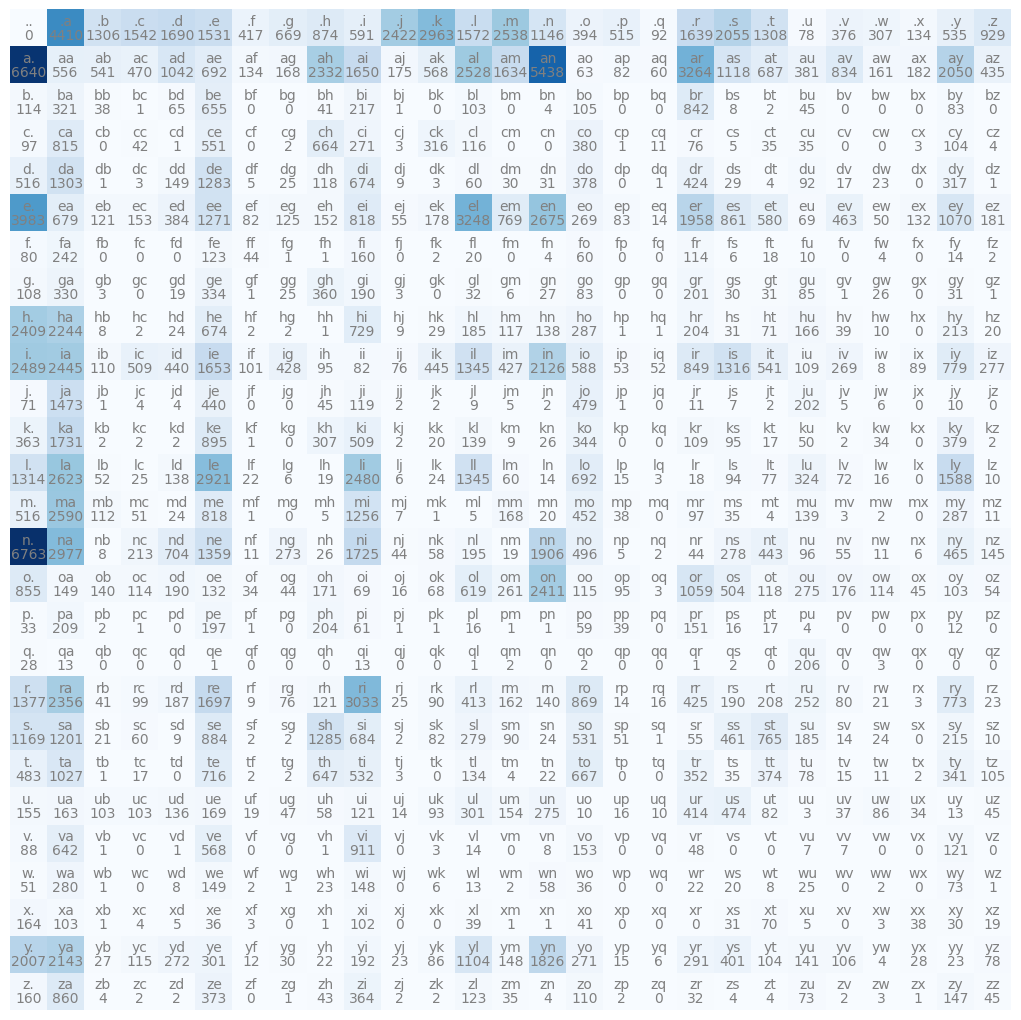

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(13,13))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [111]:
P = N.float()
P.shape


torch.Size([27, 27])

In [61]:
N.shape

torch.Size([27, 27])

In [62]:
P /= N.sum(1,keepdim=True)
P.shape

torch.Size([27, 27])

In [63]:
g = torch.Generator().manual_seed(1223123334)

for _ in range(10):
    out=[]
    ix=0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, 1,replacement=True, generator=g).item()
        if itos[ix] == ".":
            break
        else:
            out.append("".join(itos[ix]))
    print("".join(out))


rcla
mon
jhiyndre
doelyna
khalorto
ivava
elyn
vaiens
jakarhi
karvelenni


In [116]:
loglike=0
n=0
for w in ["dion"]:
    chars = ["."] + list(w) + ["."]
    for ch,chi in zip(chars,chars[1:]):
        print(ch,chi,end=" ")
        prob = P[stoi[ch],stoi[chi]]
        print(f"Prob: {prob:.4f}",end=" ")
        logprob = torch.log(prob)
        print(f"Logprob: {logprob}")
        loglike += logprob
        n+=1
nll = -loglike
print(f"{nll=}")
normll = nll/n
print(f"{normll=}")


. d Prob: 1691.0000 Logprob: 7.433075428009033
d i Prob: 675.0000 Logprob: 6.514712810516357
i o Prob: 589.0000 Logprob: 6.3784260749816895
o n Prob: 2412.0000 Logprob: 7.788211345672607
n . Prob: 6764.0000 Logprob: 8.819369316101074
nll=tensor(-36.9338)
normll=tensor(-7.3868)
